# Comparison of Multivariate Linear Regression Models

***
## BIG PICTURE
Often times, undergraduate students, especially international undergraduate students, must pay outrageous amounts of money to apply to graduate schools. The money is for applications only, and can sometimes be raked up to thousands of dollars. This dataset and analysis is to help international undergraduate students from India to shortlist universities with their academic profiles. The predicted output gives students a fair idea about their chances of being admitted to a particular university. All the students need to do is enter their academic parameters, and the national ranking of a particular university to see their chance of being admitted. This would save international undergraduate students a countless sum of money, time, and resources. 


 * How big is your dataset? (in terms of MB) 
     * Dataset is 35.2 KB 
 * How many entries does it have? 
     * 500 Entries
 * How many features does it have? 
     * 8 features, while the Chance of Admittance column is the result. 
 * What are some basic statistics you can learn right away about this dataset?
     * Serial Number - min: 1, max: 500; essentially an ID number 
     * GRE Score - mean: 316.472, std: 11.295, min: 290, max: 340 
     * TOEFL Score - mean: 107.192, std: 6.081, min: 92, max: 120
     * University Ranking - mean: 3.114, std: 1.143, min: 1, max: 5
     * Statement of Purpose Strength - mean: 3.374, std: 0.991, min: 1, max: 5 
     * Letter of Recommendation Strength - mean: 3.484, std: 0.925, min: 1, max: 5
     * Undergraduate GPA - mean: 8.576, std: 0.604, min: 6.800, max: 2.420
     * Research Experience (Categorical) - mean: 0.560, std: 0.496, min: 0, max: 1
     * Chance of Admittance (Percentage) - mean: 0.721, std: 0.141, min: 0.340, max: 0.970
         * From the generated histograms for each feature, features such as Undergraduate GPA, GRE Score, Letter of Recommendation strength, Statement of Purpose strength, TOEFL scores, and University Ratings seem to be approximately normally distributed. The distribution for chance of admittance has a slight skew to the left, as does the distribution for the Statement of Purpose strength. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


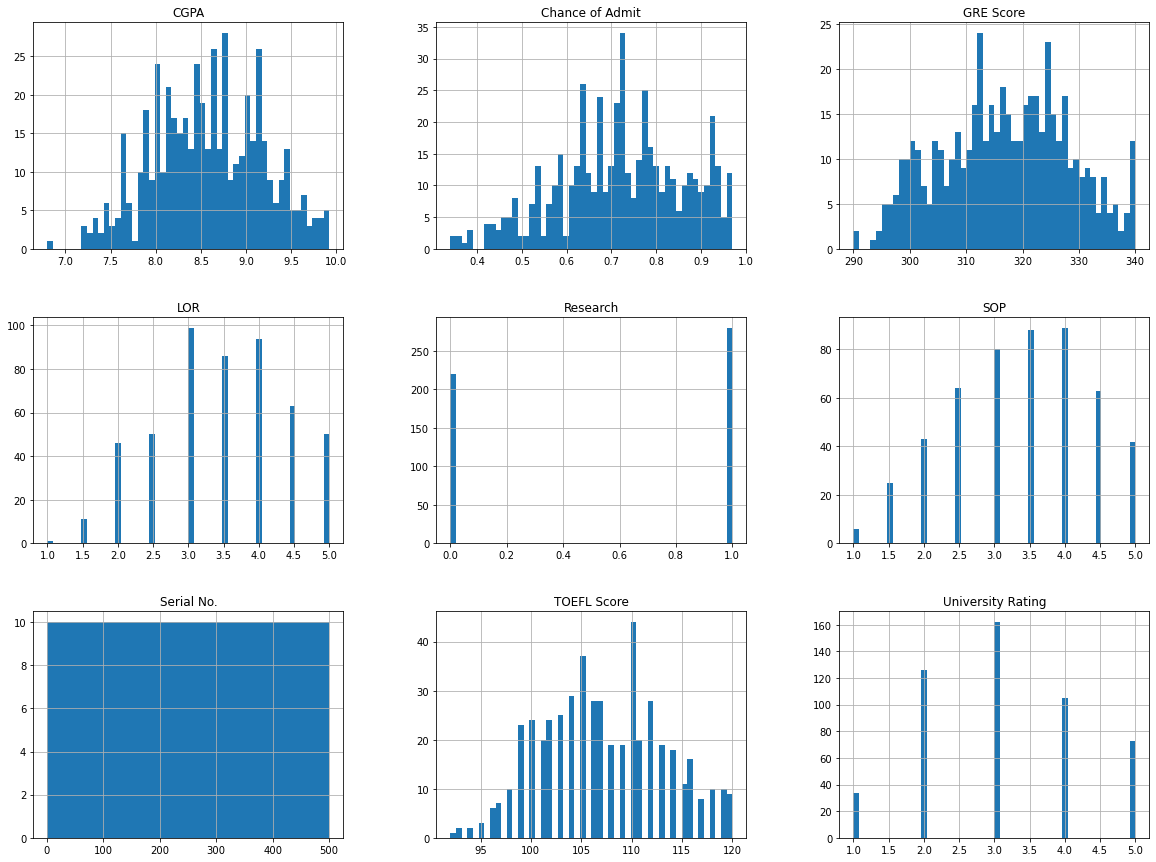

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [3]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
datasetURL = "https://www.kaggle.com/mohansacharya/graduate-admissions" ; 
# required url to download for CSV file. The TA will need to download the file and run your program.
# had to convert excel file to a csv file 
def load_data(): # load data function
    csv_path = os.path.join("admissions.csv") # path 
    return pd.read_csv(csv_path, sep='\s*,\s*',
                           header=0, encoding='ascii', engine='python')
admissions = load_data() 
admissions.info() # returns attributes of dataset 
admissions.describe() # returns basic statistics of dataset 
%matplotlib inline
import matplotlib.pyplot as plt
admissions.hist(bins=50, figsize=(20,15)) # plots histograms of each feature 
plt.show()
admissions.head()

---
## DATA DISCOVERY, CLEANING, AND SCALING

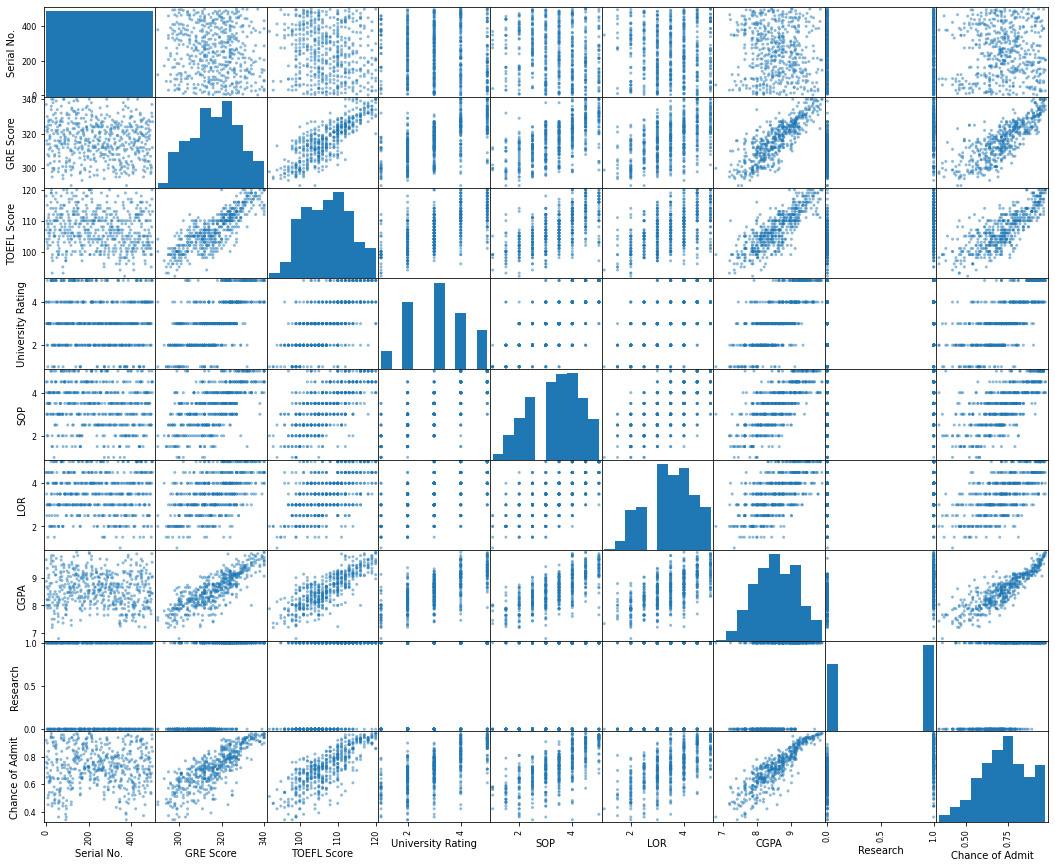

In [4]:

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# data discover: correlation matrices 
from pandas.plotting import scatter_matrix
attributes = ['Serial No.', 'GRE Score', 'TOEFL Score','University Rating',
             'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
scatter_matrix(admissions[attributes], figsize=(18, 15))

# Looking at the correlation matrices, GRE scores, TOEFL scores, GPA, 
# Letter of Recommendation strength, Statement of Purpose strength, 
# and Chance of Admittance seem to be very heavily correlated with one another. 

# data discover: correlation coefficients with prediction value 
corr_matrix = admissions.corr()

df = admissions.drop(['Serial No.','Research'],axis=1);

# splitting data into training and test sets 
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

# splitting data into x and y for training/test sets 
X_train = train_set.drop("Chance of Admit", axis=1);
y_train = train_set["Chance of Admit"].copy();
X_test = test_set.drop("Chance of Admit", axis=1);
y_test = test_set["Chance of Admit"].copy();

# data doesn't require cleaning -- no missing values, no categorical features 
# features do need to be scaled, using standard scaler 
my_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

y_train = y_train.values.reshape(400, 1)
x_train = my_pipeline.fit_transform(X_train)
x_train = np.c_[np.ones((x_train.shape[0],1)), x_train]
X_test = my_pipeline.fit_transform(X_test)



- - -
## IMPLEMENTATION OF GRADIENT DESCENT

In [6]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation

class MyLinearRegression:
    def __int__ (self):
        self.theta = 0; # parameter vector;
        self.alpha = 0.1; # learning rate
        self.cost  = 0; # cost function
        self.iterations = 1000
    
    def fitUsingGradientDescent(self, X_train, y_train, theta, alpha, iters):
        # INPUT:
        # alpha: the learning rate
        # iters: number of iterations
        # 
        # OUTPUT: 
        # theta: updated value for theta
        # cost: value of the cost function
        #
        # implementation code here
        n_iterations = iters
        m = len(x_train)
        #theta = np.random.randn(400,7)
        self.theta = theta
        self.alpha = alpha
        costFunc = []
        
        for iteration in range(n_iterations):
            gradients = 2/m * x_train.T.dot(x_train.dot(self.theta) - y_train)
            self.theta = self.theta - self.alpha * gradients
            cost = (1/m) * (x_train.dot(self.theta) - y_train).T.dot(x_train.dot(self.theta)-y_train)
            costFunc.append(cost)
        return theta, costFunc
    
    def predict(self, X_test):
        # implementation code here
        x_test = np.c_[np.ones((len(X_test),1)), X_test]
        y_predict = x_test.dot(self.theta)
        return y_predict
    
    
    def fitUsingNormalEquation(self, X_train, y_train):
        self.theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
        return theta
        
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
# myGradientDescentModel.fitUsingGradientDescent(X_train, y_train) 
theta = np.random.randn(7,1)
# theta, costFunc = myGradientDescentModel.gradientDescent(x_train, y_train, theta, .02, 1000)


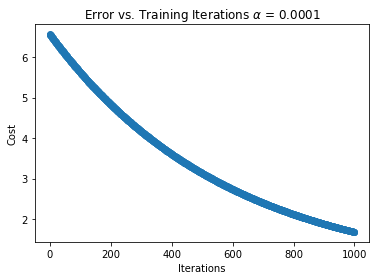

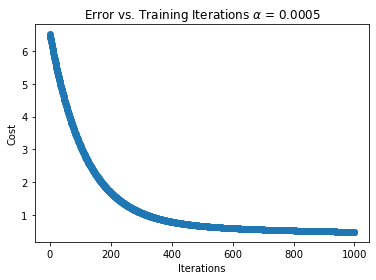

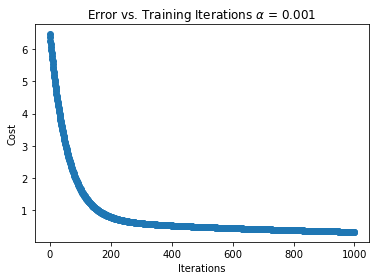

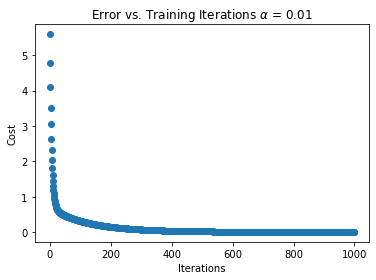

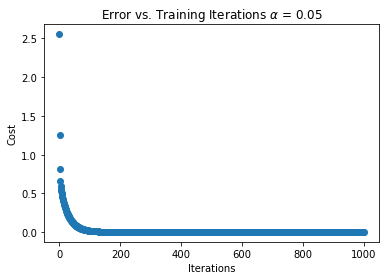

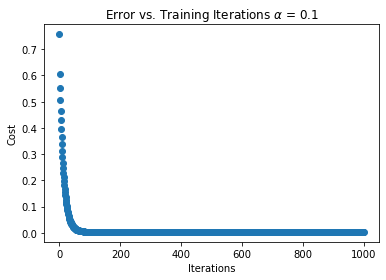

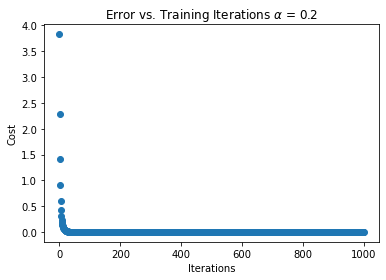

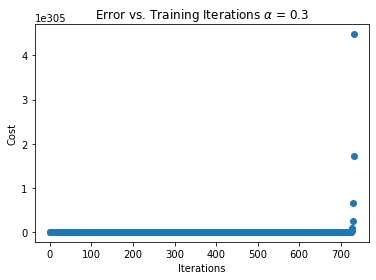

In [7]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
#
a = [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
for a_i in a:
    # new model for each alpha
    myGradientDescentModel = MyLinearRegression()
    theta, costfunc = myGradientDescentModel.fitUsingGradientDescent(x_train, y_train, theta, a_i, 1000)
    y_pred = myGradientDescentModel.predict(X_test)
    # new plot
    plt.figure()
    plt.scatter(range(len(costfunc)), costfunc)
    plt.xlabel('Iterations')  
    plt.ylabel('Cost')  
    plt.title(r'Error vs. Training Iterations $\alpha$ = ' + str(a_i))  
    
    # Seems as though alpha value of 0.01 would be the best parameter 

- - -
## IMPLEMENTATION OF THE NORMAL EQUATION

In [8]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(x_train, y_train)

array([[ 0.76743473],
       [-0.46947439],
       [ 0.54256004],
       [-0.46341769],
       [-0.46572975],
       [ 0.24196227],
       [-1.91328024]])

- - -
## COMPARISON OF DIFFERENT IMPLEMENTATIONS

In [9]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(x_train,y_train)
x_test = np.c_[np.ones((len(X_test),1)), X_test]
y_predict = mySGDModel.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("Scholastic Gradient Descent RMSE:" + str(mySGDModel_rmse))

# myGradientDescentModel_rmse  
from sklearn.metrics import mean_squared_error

# using the best learning step I found 
theta, costfunc = myGradientDescentModel.fitUsingGradientDescent(x_train, y_train, theta, 0.01, 1000)
y_pred1 = myGradientDescentModel.predict(X_test)
gradientDescent_mse = mean_squared_error(y_pred1, y_test)
gradientDescent_rmse = np.sqrt(gradientDescent_mse)
print("Gradient Descent RMSE:"+ str(gradientDescent_rmse))

# myNormalEquationModel_rmse 
theta = myNormalEquationModel.fitUsingNormalEquation(x_train, y_train)
y_pred2 = myNormalEquationModel.predict(X_test)
normalEquation_mse = mean_squared_error(y_pred2, y_test)
normalEquation_rmse = np.sqrt(normalEquation_mse)
print("Normal Equation RMSE:" + str(normalEquation_rmse))

# It seems as though my implementation of Gradient Descent yields the best performance measure for my dataset. With 
# a value of 0.0618, my Gradient Descent model comes in with a tiny bit smaller RMSE than the SGD model and the normal
# equation model. My assessment of the error was that my error is not terrible. My ending outcome is in proportions, 
# so a RMSE of approximately 0.06 is not too bad but could also have a relatively significant effect on differentiating
# some outcomes. A 0.80 chance of admittance vs. a 0.86 chance of admittance could make a difference to some students. 

Scholastic Gradient Descent RMSE:0.06359491991014035
Gradient Descent RMSE:0.06892599972509891
Normal Equation RMSE:0.06225914002495173


- - -
## PRESENTATION OF SOLUTION

Today, a higher-degree education is necessary to increase an individual's chances for employment, and other life opportunities. For individuals from different countries, the fees for applying to undergraduate and graduate schools can be hefty. The purpose of this study is to help undergraduate students in India shortlist graduate colleges based on ranking and their chance of admittance to the college. This data set held many academic attributes of an undergraduate international student, and I initially thought I could predict which attributes would hold the most weight for admittance but the outcome of my study had a different answer. In this study, I trained a linear regression model that accurately predicts an undergraduate student's chance of admittance into a specified graduate school. I found that the attributes that held the most weight in a student's chance of admittance were the GRE scores and the TOEFL scores, which surprised me because I would have believed that GPA would have held an equally important weight. I was able to find a linear regression model through 3 different optimization techniques, which all returned the same relative amount of error (RMSE values approximated to 0.06) -- indicating that the model would be an excellent tool for international undergraduate students to use in graduate school decisions.  All the undergraduate students need to do is specify their academic parameters -- test scores, GPA, etc. -- and the national ranking of a particular university they wish to attend in order to to see their chance of admittance. This would save international undergraduate students a countless sum of money, time, and resources. 